# **Task 5: Morphological Operations**

Given the following image, identify 'O' in the image using morphological operations.

<img src="https://raw.githubusercontent.com/omzlette/FRA321_Basic_AI/main/PYCV/img/text_frombook.png" width=1000/>

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import urllib

# Read image from URL
req = urllib.request.urlopen('https://raw.githubusercontent.com/omzlette/FRA321_Basic_AI/main/PYCV/img/text_frombook.png')
arr = np.asarray(bytearray(req.read()), dtype=np.uint8)
oriimg = cv2.imdecode(arr, cv2.IMREAD_GRAYSCALE)

In [8]:
def imreconstruct(mask, marker):
    se = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))
    recon = marker
    reconold = np.zeros(recon.shape, dtype=np.uint8)
    while np.sum(np.sum(recon - reconold)) != 0:
        reconold = recon
        recon = cv2.dilate(recon, se)
        recon = cv2.bitwise_and(recon, mask)
    return recon

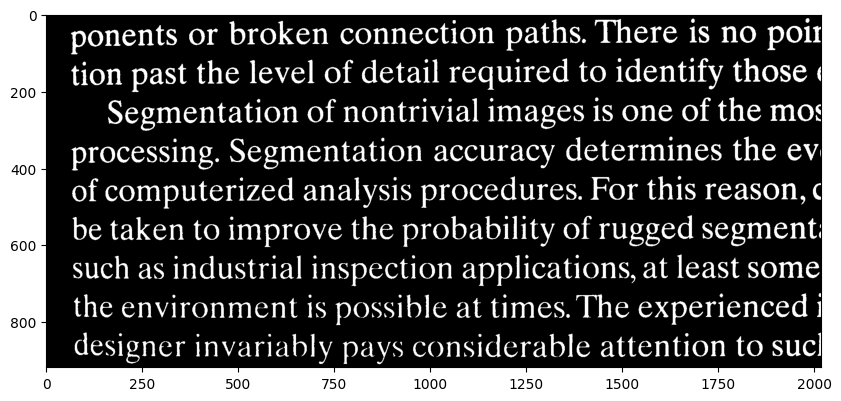

In [19]:
plt.figure(figsize=(10, 10))
plt.imshow(oriimg, cmap='gray')
plt.show()

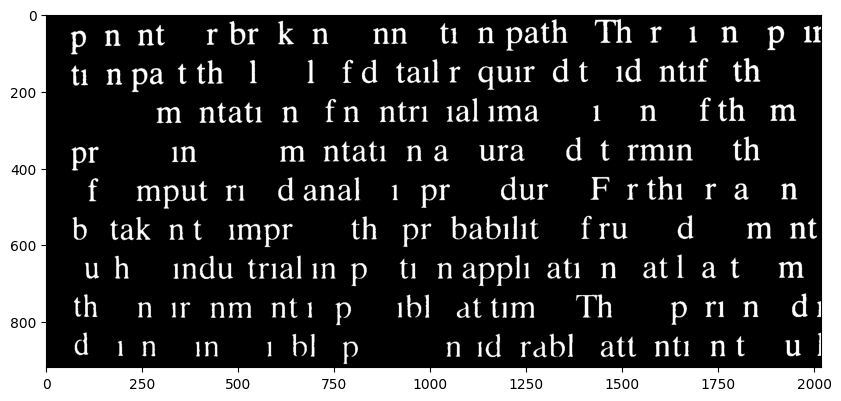

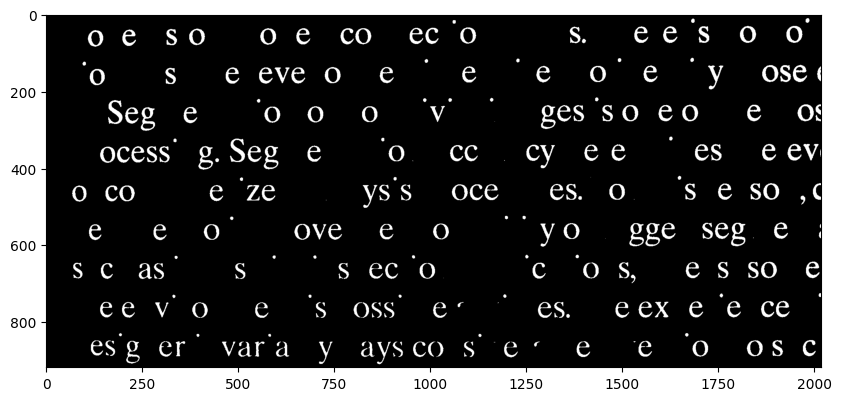

In [55]:
outimg = cv2.morphologyEx(oriimg, cv2.MORPH_ERODE, np.ones((30, 6)))

outimg = imreconstruct(oriimg, outimg)

mask = cv2.bitwise_xor(oriimg, outimg)

plt.figure(figsize=(10, 10))
plt.imshow(outimg, cmap='gray')
plt.show()
plt.close

plt.figure(figsize=(10, 10))
plt.imshow(mask, cmap='gray')
plt.show()
plt.close()